### Load Data

In [ ]:
import google.colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
from pathlib import Path
drive.mount('/content/drive')

DATA = Path('/content/drive/My Drive/Brian-Minkyu Collaboration/')
df = pd.read_csv(DATA /'HR_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [ ]:
# Apply data mask

df = df.drop(columns=['Full_Name'])
df.head(5)

,Unnamed: 0,Employee_ID,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [ ]:
# Check for null entries

df.isnull().sum()

,0
Unnamed: 0,0
Employee_ID,0
Department,0
Job_Title,0
Hire_Date,0
Location,0
Performance_Rating,0
Experience_Years,0
Status,0
Work_Mode,0


In [ ]:
# Check for duplicate entries

df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Employee_ID', 'Department', 'Job_Title', 'Hire_Date',
       'Location', 'Performance_Rating', 'Experience_Years', 'Status',
       'Work_Mode', 'Salary_INR'],
      dtype='object')

In [ ]:
# Adjust data types

to_string = ['Department', 'Job_Title', 'Location', 'Status', 'Work_Mode']

df[to_string] = df[to_string].astype(str)

df.dtypes


,0
Unnamed: 0,int64
Employee_ID,object
Department,object
Job_Title,object
Hire_Date,object
Location,object
Performance_Rating,int64
Experience_Years,int64
Status,object
Work_Mode,object


In [ ]:
# Check conversion
type(df.loc[1,'Job_Title'])

str

In [ ]:
# Adjust to datetime

df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], format='%Y-%m-%d')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   Employee_ID         object        
 2   Department          object        
 3   Job_Title           object        
 4   Hire_Date           datetime64[ns]
 5   Location            object        
 6   Performance_Rating  int64         
 7   Experience_Years    int64         
 8   Status              object        
 9   Work_Mode           object        
 10  Salary_INR          int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 167.8+ MB


In [ ]:
# Isolate Country

df[['City','Country']] = df['Location'].str.split(', ', expand=True)
df.head(5)



,Unnamed: 0,Employee_ID,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country
0,0,EMP0000001,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Isaacland,Denmark
1,1,EMP0000002,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Anthonyside,Costa Rica
2,2,EMP0000003,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Port Christinaport,Saudi Arabia
3,3,EMP0000004,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,Port Shelbychester,Antigua and Barbuda
4,4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,Lake Kimberly,Palestinian Territory


In [ ]:
# Isolate Years

df['Experience_Years'] = df['Hire_Date'].dt.year
df.head(5)

,Unnamed: 0,Employee_ID,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country
0,0,EMP0000001,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,2011,Resigned,On-site,1585363,Isaacland,Denmark
1,1,EMP0000002,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,2018,Active,On-site,847686,Anthonyside,Costa Rica
2,2,EMP0000003,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2023,Active,On-site,1430084,Port Christinaport,Saudi Arabia
3,3,EMP0000004,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,2023,Active,On-site,990689,Port Shelbychester,Antigua and Barbuda
4,4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,2024,Active,On-site,535082,Lake Kimberly,Palestinian Territory


In [ ]:
# Clean up Database

df.drop(columns=['Unnamed: 0','Location'], inplace=True)
df.head(5)

,Employee_ID,Department,Job_Title,Hire_Date,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country
0,EMP0000001,IT,Software Engineer,2011-08-10,5,2011,Resigned,On-site,1585363,Isaacland,Denmark
1,EMP0000002,Marketing,SEO Specialist,2018-03-02,2,2018,Active,On-site,847686,Anthonyside,Costa Rica
2,EMP0000003,HR,HR Manager,2023-03-20,1,2023,Active,On-site,1430084,Port Christinaport,Saudi Arabia
3,EMP0000004,IT,Software Engineer,2023-10-12,1,2023,Active,On-site,990689,Port Shelbychester,Antigua and Barbuda
4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,5,2024,Active,On-site,535082,Lake Kimberly,Palestinian Territory


### Exploratory Data Analysis

In [ ]:
df.describe()

,Hire_Date,Performance_Rating,Experience_Years,Salary_INR
count,2000000,2.000000e+06,2.000000e+06,2.000000e+06
mean,2020-02-11 07:02:40.689599488,3.000148e+00,2.019613e+03,8.968878e+05
min,2010-08-14 00:00:00,1.000000e+00,2.010000e+03,3.000000e+05
25%,2017-06-27 00:00:00,2.000000e+00,2.017000e+03,6.163460e+05
50%,2020-08-12 00:00:00,3.000000e+00,2.020000e+03,8.110265e+05
75%,2023-02-09 00:00:00,4.000000e+00,2.023000e+03,1.073745e+06
max,2025-08-13 00:00:00,5.000000e+00,2.025000e+03,2.999976e+06
std,NaN,1.413973e+00,3.638193e+00,4.026103e+05


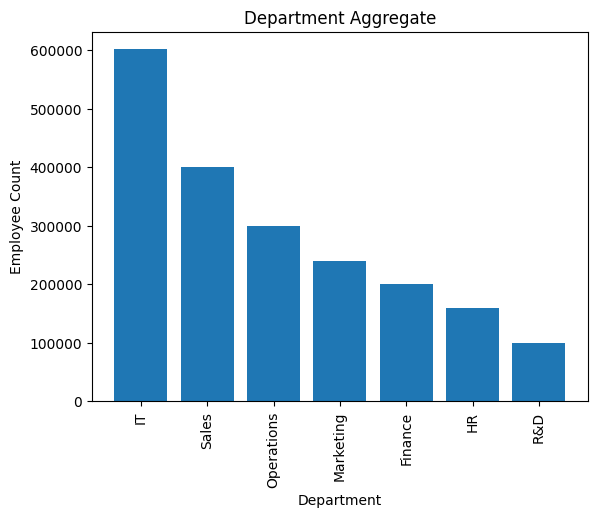

In [ ]:
# Bar chart for Department

chart = 'Department'

plt.bar(df[chart].value_counts().index, df[chart].value_counts().values)

plt.title(f"{chart} Aggregate")
plt.xlabel(chart)
plt.ylabel('Employee Count')
plt.xticks(rotation=90)
plt.show()

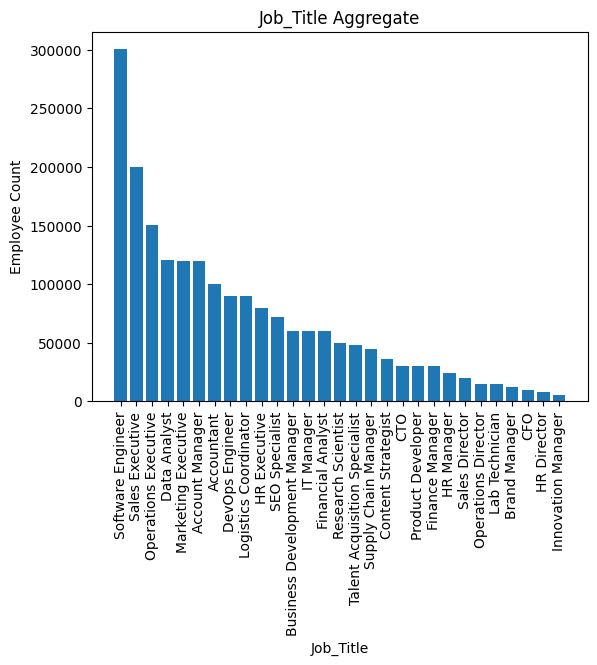

In [ ]:
# Bar chart for Job Title

chart = 'Job_Title'

plt.bar(df[chart].value_counts().index, df[chart].value_counts().values)

plt.title(f"{chart} Aggregate")
plt.xlabel(chart)
plt.ylabel('Employee Count')
plt.xticks(rotation=90)
plt.show()

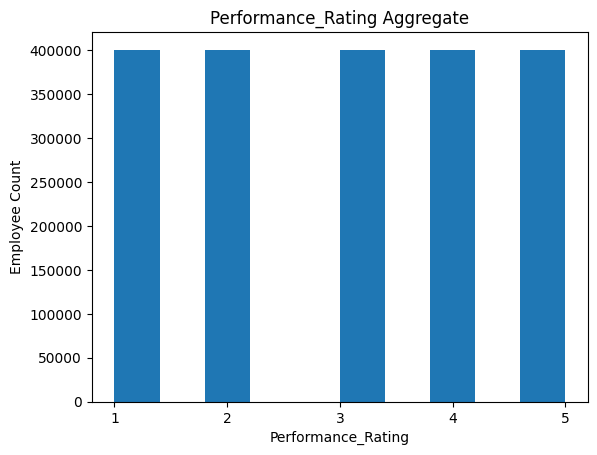

In [ ]:
# Histogram for Performance_Rating

chart = 'Performance_Rating'

plt.hist(df[chart])
plt.title(f"{chart} Aggregate")

plt.xticks([1,2,3,4,5])
plt.xlabel(chart)
plt.ylabel('Employee Count')
plt.show()


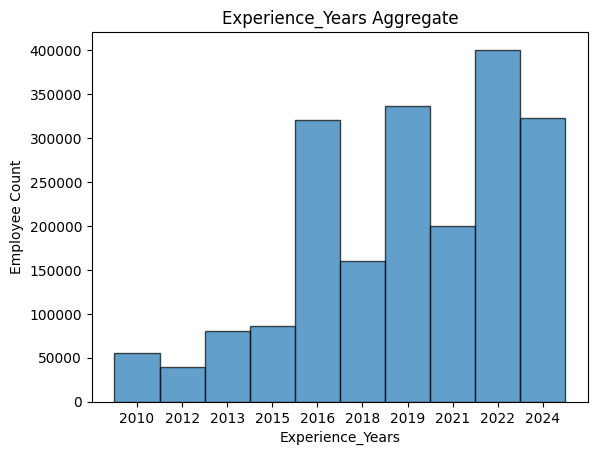

In [ ]:
# Histogram for Experience_Years
df['Experience_Years'] = df['Experience_Years'].astype(int)

chart = 'Experience_Years'

# Create histogram and get bin values
counts, bins, patches = plt.hist(df[chart], edgecolor='black', alpha=0.7)

# Calculate bin centers for x-ticks
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, [f'{int(x)}' for x in bin_centers])

plt.title(f"{chart} Aggregate")
plt.xlabel(chart)
plt.ylabel('Employee Count')
# plt.grid(axis='y', alpha=0.3)
plt.show()

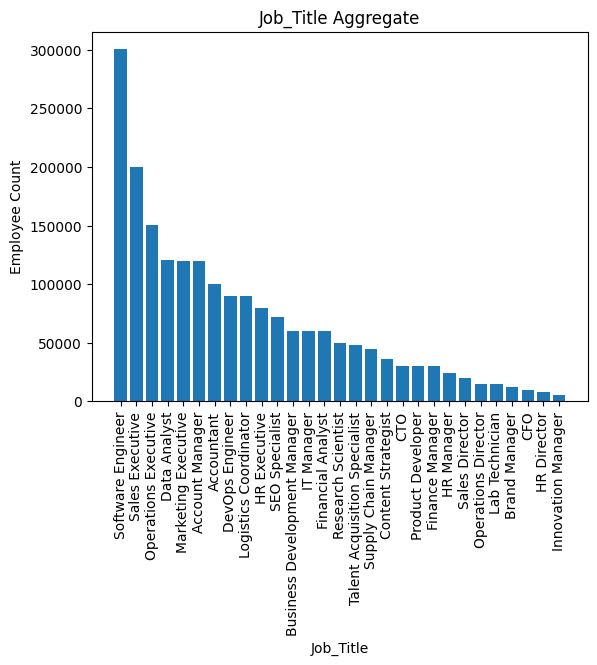

In [ ]:
# Bar chart for Job Title

chart = 'Job_Title'

plt.bar(df[chart].value_counts().index, df[chart].value_counts().values)

plt.title(f"{chart} Aggregate")
plt.xlabel(chart)
plt.ylabel('Employee Count')
plt.xticks(rotation=90)
plt.show()

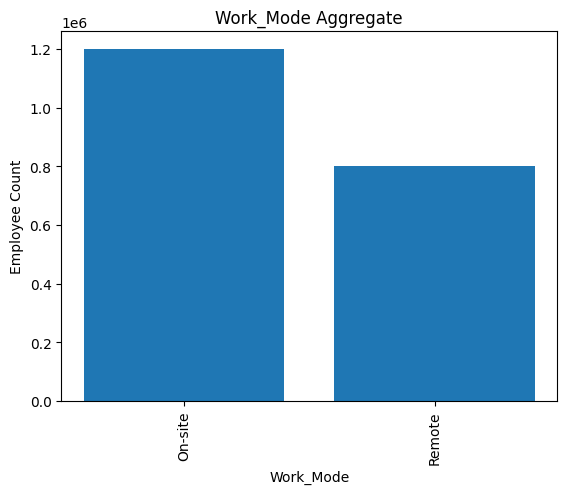

In [ ]:
# Bar chart for Job Title

chart = 'Work_Mode'

plt.bar(df[chart].value_counts().index, df[chart].value_counts().values)

plt.title(f"{chart} Aggregate")
plt.xlabel(chart)
plt.ylabel('Employee Count')
plt.xticks(rotation=90)
plt.show()

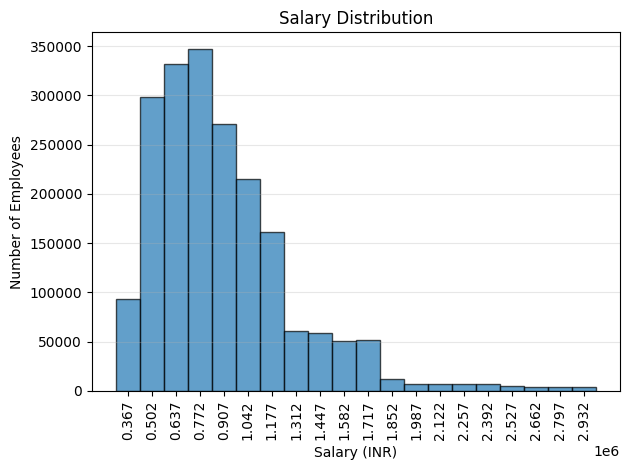

In [ ]:
# Histogram for Salary_INR
counts, bins, patches = plt.hist(df['Salary_INR'], bins=20, edgecolor='black', alpha=0.7)

# Calculate center of each bin for tick placement
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)
plt.xticks(rotation=90)


plt.title('Salary Distribution')
plt.xlabel('Salary (INR)')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The amount of countries in this database is:  243


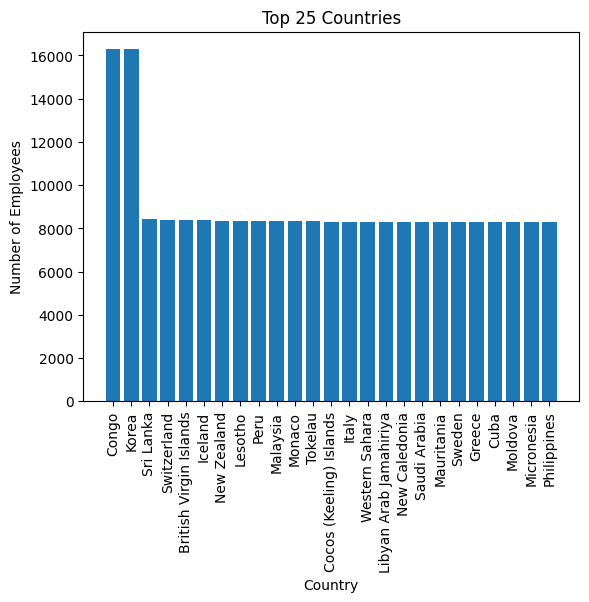

In [ ]:
# Count of how many Countries

print("The amount of countries in this database is: ",df['Country'].value_counts().count())

# Because of the large dataset of countries, let us limit to top 25 for cursory view.

top_25 = pd.DataFrame(df['Country'].value_counts().head(25))
top_25


plt.bar(top_25.index, top_25['count'])
plt.title('Top 25 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()



## Questions

### Q1: What is the distribution of Employee Status (Active, Resigned, Retired, Terminated) ?



<Axes: ylabel='count'>

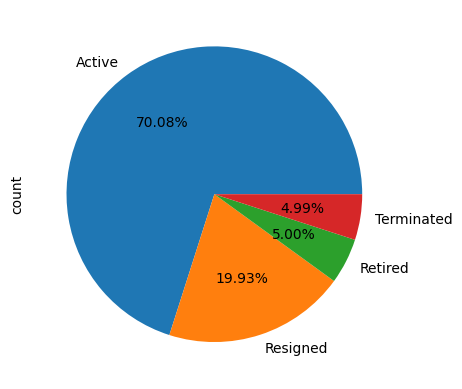

In [ ]:
stat_distrib = df['Status'].value_counts()

stat_distrib.plot(kind="pie", autopct='%1.2f%%')


### Q2: What is the distribution of work modes (On-site, Remote) ?

<Axes: ylabel='count'>

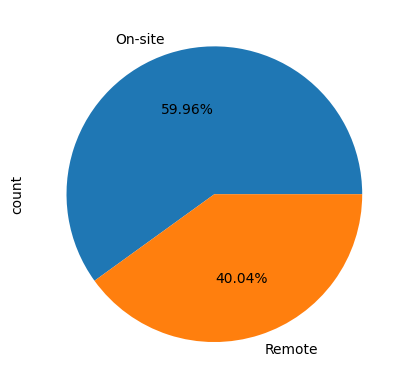

In [ ]:
stat_distrib = df['Work_Mode'].value_counts()

stat_distrib.plot(kind="pie", autopct='%1.2f%%')


### Q3: How many employees are there in each department ?



In [ ]:
df['Department'].value_counts()

,count
Department,
IT,601042
Sales,400031
Operations,300095
Marketing,240081
Finance,199873
HR,159119
R&D,99759


### Q4: What is the average salary by Department ?



<Axes: title={'center': 'Salary_INR'}, xlabel='Department'>

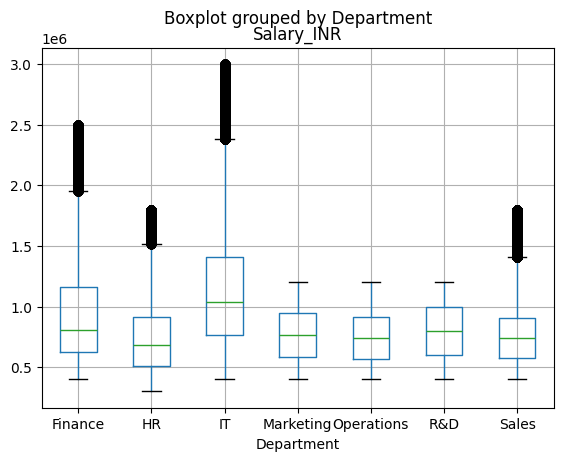

In [ ]:
df.boxplot(column='Salary_INR', by='Department')

In [ ]:
stats = df.groupby('Department')['Salary_INR'].describe()
stats


,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Finance,199873.0,9.404117e+05,452030.280955,400003.0,626638.0,805431.0,1157303.0,2499958.0
HR,159119.0,7.438536e+05,320828.951659,300000.0,505098.0,680512.0,910455.0,1799839.0
IT,601042.0,1.129858e+06,498064.099249,400001.0,764009.5,1036675.0,1410141.0,2999976.0
Marketing,240081.0,7.699362e+05,220144.446233,400003.0,581507.0,763590.0,945489.0,1199997.0
Operations,300095.0,7.546263e+05,219906.424766,400002.0,568917.5,737975.0,914097.5,1199991.0
R&D,99759.0,8.003772e+05,231017.989085,400004.0,599419.0,800964.0,999666.0,1199995.0
Sales,400031.0,7.929579e+05,293594.650271,400000.0,574369.0,743400.0,907290.5,1799983.0


In [ ]:
# The average salary by dept below:

stats['mean']

,mean
Department,
Finance,9.404117e+05
HR,7.438536e+05
IT,1.129858e+06
Marketing,7.699362e+05
Operations,7.546263e+05
R&D,8.003772e+05
Sales,7.929579e+05


### Q5: Which job title has the highest average salary ?



The highest salary average salary is IT.

In [ ]:
stats = df.groupby('Job_Title')['Salary_INR'].describe().sort_values('mean', ascending=False)

stats


,count,mean,std,min,25%,50%,75%,max
Job_Title,,,,,,,,
IT Manager,60224.0,2.098156e+06,519049.119583,1200003.0,1652812.50,2095033.5,2547491.50,2999976.0
Finance Manager,29799.0,1.743242e+06,432369.661940,1000036.0,1365496.50,1741426.0,2112898.00,2499958.0
HR Manager,23841.0,1.252402e+06,317586.610711,700133.0,977843.00,1253718.0,1528445.00,1799839.0
Business Development Manager,60233.0,1.252016e+06,318115.378809,700041.0,977509.00,1253401.0,1529940.00,1799983.0
Software Engineer,300358.0,1.199261e+06,346574.781068,600001.0,899049.25,1198076.5,1499600.75,1799994.0
Financial Analyst,59815.0,1.051523e+06,259700.423027,600016.0,827274.50,1050827.0,1276894.00,1499991.0
Brand Manager,12081.0,8.031278e+05,231880.365846,400051.0,604265.00,805956.0,1005880.00,1199824.0
Innovation Manager,5041.0,8.018701e+05,233111.837658,400284.0,595372.00,804647.0,1001019.00,1199896.0
Talent Acquisition Specialist,47994.0,8.014222e+05,231514.951517,400043.0,599524.25,801844.0,1003274.25,1199995.0


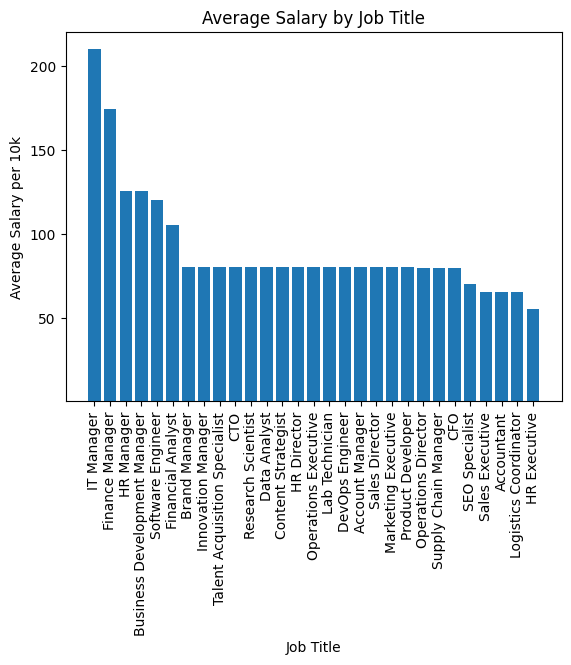

In [ ]:
plt.bar(stats.index, stats['mean'])
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])
plt.show()

### Q.6) What is the average salary in different Departments based on Job Title ?



In [ ]:
df['Department'].value_counts().index

Index(['IT', 'Sales', 'Operations', 'Marketing', 'Finance', 'HR', 'R&D'], dtype='object', name='Department')

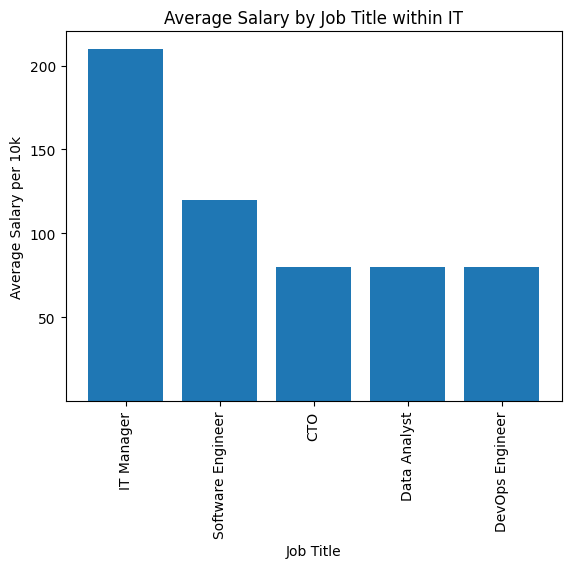

In [ ]:
dept = 'IT'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


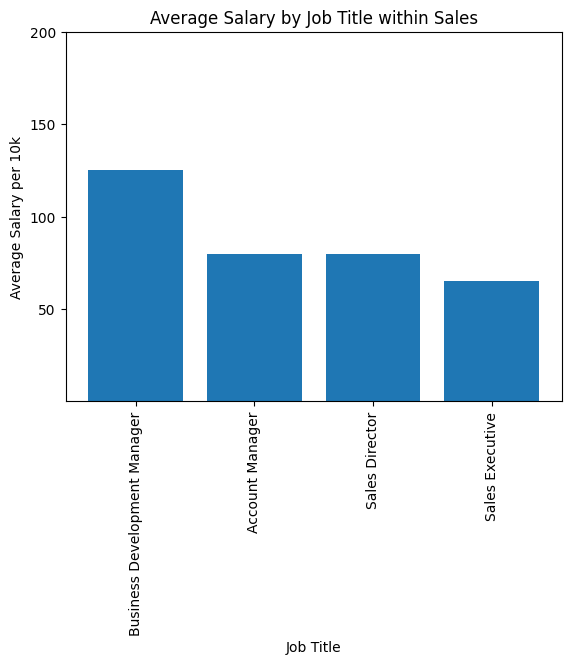

In [ ]:
dept = 'Sales'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


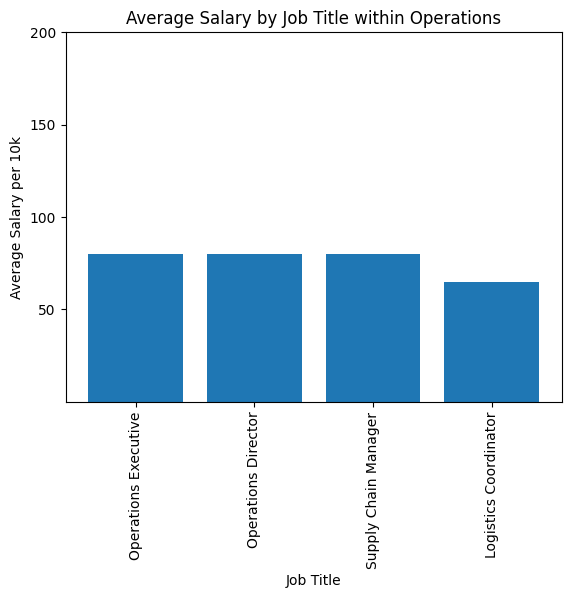

In [ ]:
dept = 'Operations'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


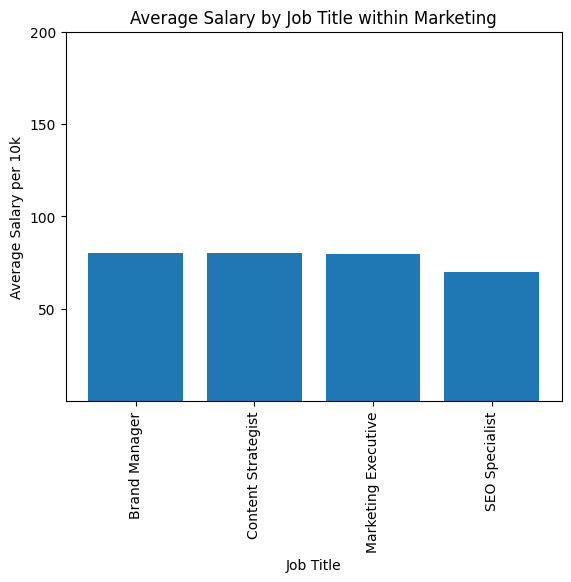

In [ ]:
dept = 'Marketing'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


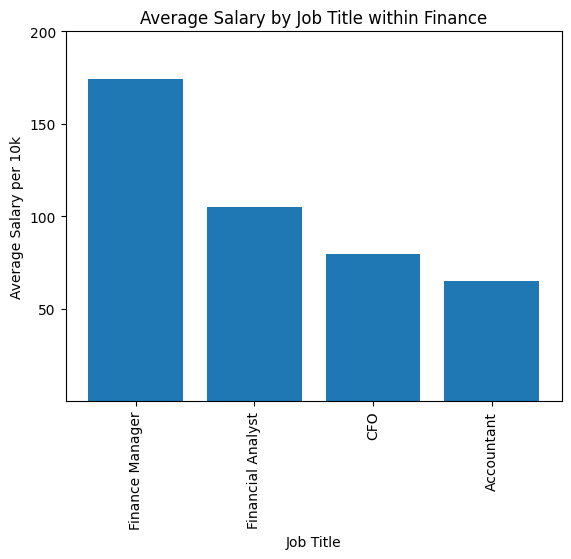

In [ ]:
dept = 'Finance'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


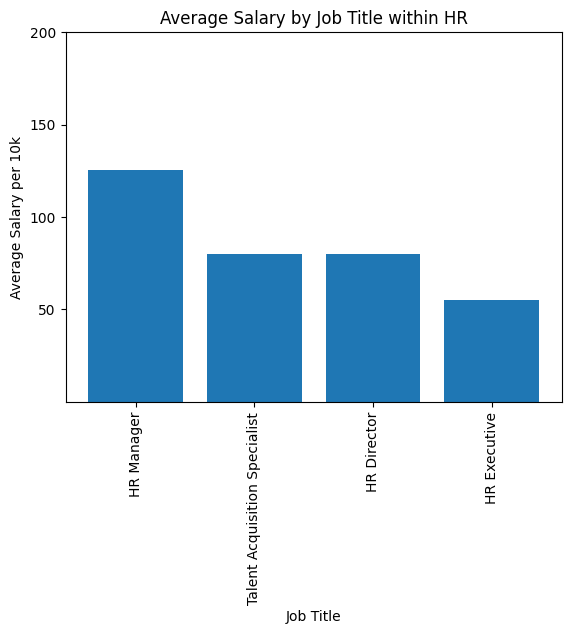

In [ ]:
dept = 'HR'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


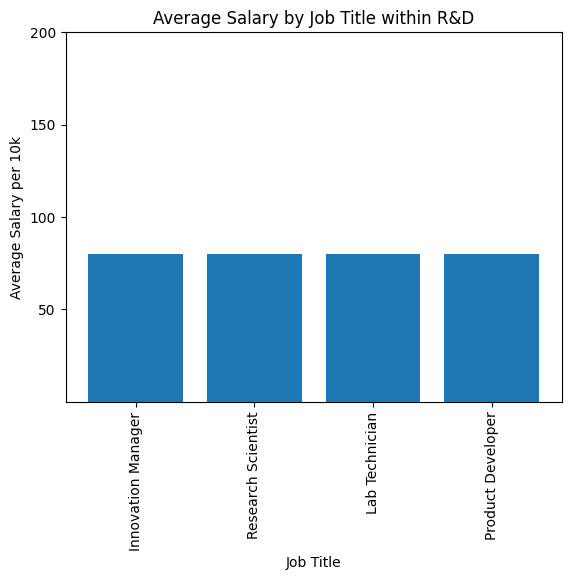

In [ ]:
dept = 'R&D'
filtered_df = df[df['Department']==dept]
sorted_df = filtered_df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False)

plt.bar(sorted_df.index, sorted_df.values)
plt.title(f'Average Salary by Job Title within {dept}')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per 10k')
plt.xticks(rotation=90)
plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])

plt.show()


### Q.7) How many employees Resigned & Terminated in each department ?



In [ ]:
df['Status'].value_counts()

,count
Status,
Active,1401558
Resigned,398660
Retired,99912
Terminated,99870


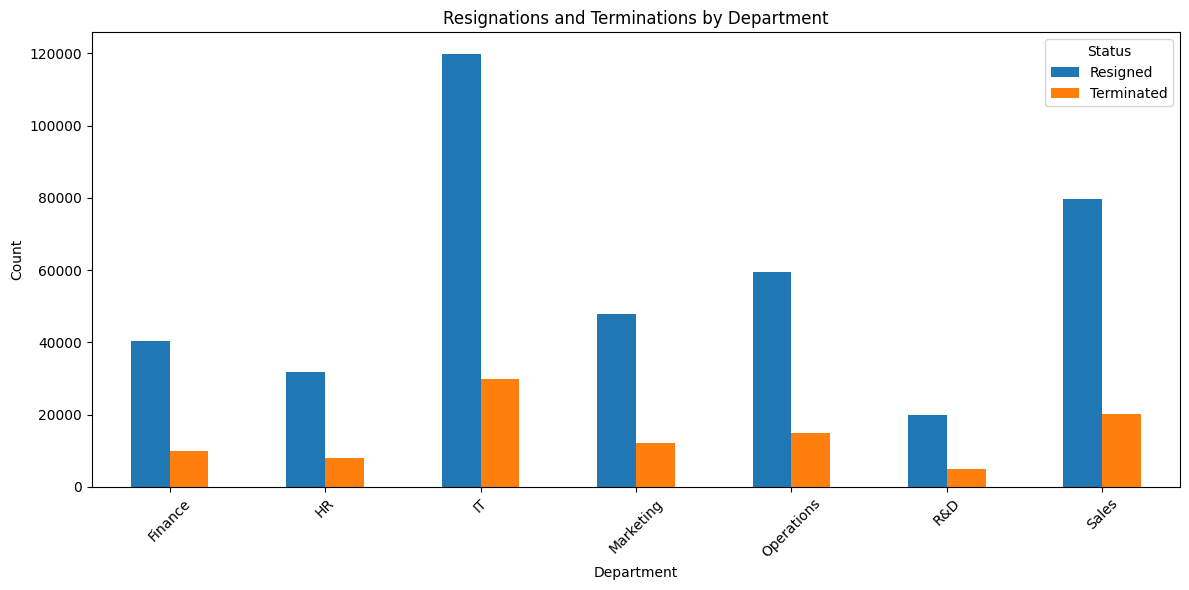

In [ ]:
filtered_df = df[df['Status'].isin(['Resigned','Terminated'])]
stats = filtered_df.groupby('Department')['Status'].value_counts()
stats

# Unstack the multi-index for plotting
stats_unstacked = stats.unstack(fill_value=0)

# Create grouped bar chart
ax = stats_unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('Resignations and Terminations by Department')
plt.ylabel('Count')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

### Q.8) How does salary vary with years of experience ?



In [ ]:
df['Years'] = 2025 - df['Experience_Years']

In [ ]:
df.head(5)

,Employee_ID,Department,Job_Title,Hire_Date,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country,Years
0,EMP0000001,IT,Software Engineer,2011-08-10,5,2011,Resigned,On-site,1585363,Isaacland,Denmark,14
1,EMP0000002,Marketing,SEO Specialist,2018-03-02,2,2018,Active,On-site,847686,Anthonyside,Costa Rica,7
2,EMP0000003,HR,HR Manager,2023-03-20,1,2023,Active,On-site,1430084,Port Christinaport,Saudi Arabia,2
3,EMP0000004,IT,Software Engineer,2023-10-12,1,2023,Active,On-site,990689,Port Shelbychester,Antigua and Barbuda,2
4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,5,2024,Active,On-site,535082,Lake Kimberly,Palestinian Territory,1


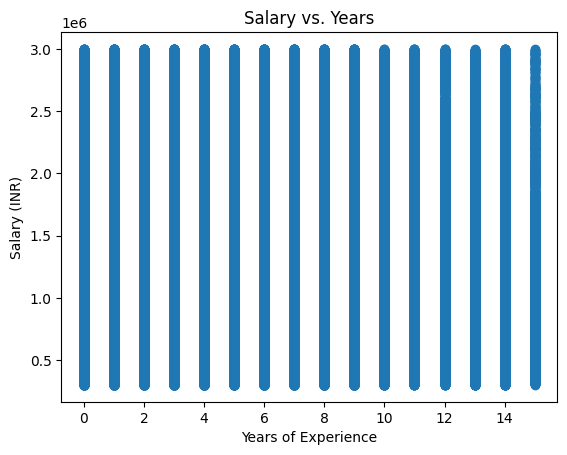

In [ ]:
plt.scatter(df['Years'], df['Salary_INR'])
plt.title('Salary vs. Years')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')
plt.show()

### Q.9) What is the average performance rating by department ?



In [ ]:
df['Department'].value_counts().index

Index(['IT', 'Sales', 'Operations', 'Marketing', 'Finance', 'HR', 'R&D'], dtype='object', name='Department')

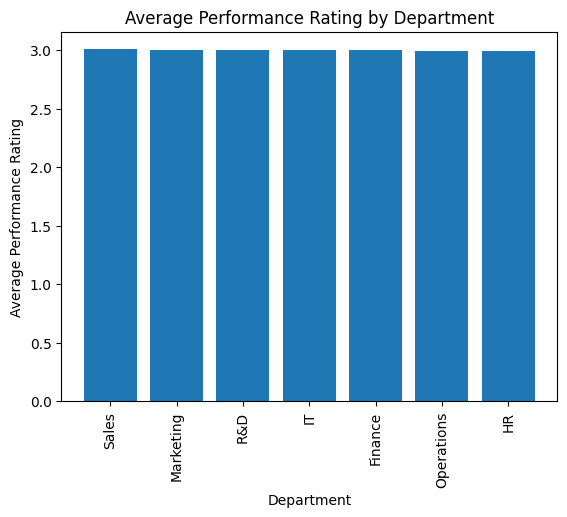

In [ ]:
stats = df.groupby('Department')['Performance_Rating'].describe().sort_values('mean', ascending=False)
stats

plt.bar(stats.index, stats['mean'])
plt.title('Average Performance Rating by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=90)
plt.show()

### Q.10) Which Country have the highest concentration of employees ?



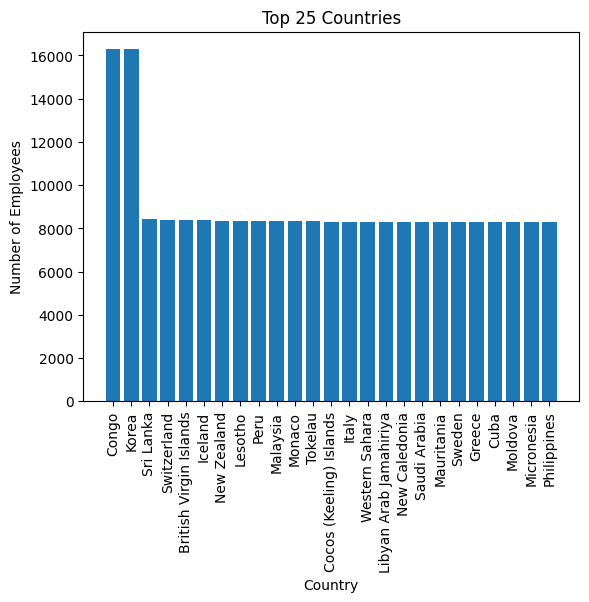

In [ ]:

top_25 = pd.DataFrame(df['Country'].value_counts().head(25))
top_25


plt.bar(top_25.index, top_25['count'])
plt.title('Top 25 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()


### Q.11) Is there a correlation between performance rating and salary ?



There is no correlation between performance rating and salary.

Text(0.5, 0, 'Performance Rating')

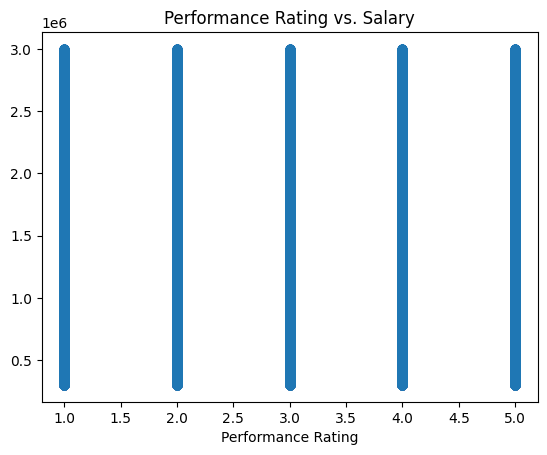

In [ ]:
plt.scatter(df['Performance_Rating'], df['Salary_INR'])
plt.title('Performance Rating vs. Salary')
plt.xlabel('Performance Rating')

### Q.12) How has the number of hires changed over time (per year) ?



Number of hires reached a new height in 2021 before falling in 2024.

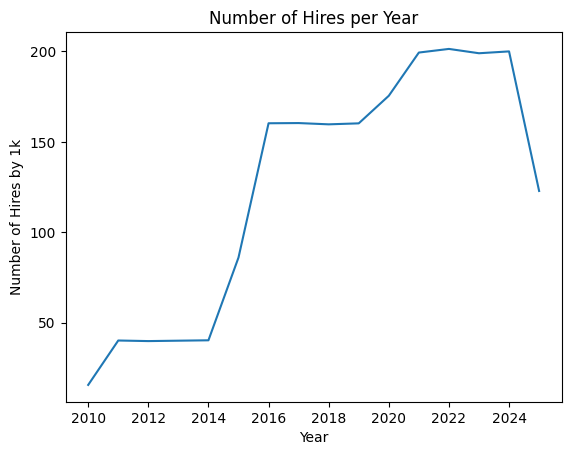

In [ ]:
plt.plot(df['Hire_Date'].dt.year.value_counts().sort_index())
plt.title('Number of Hires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires by 1k')
plt.yticks([50000, 100000, 150000, 200000], ['50', '100', '150', '200'])

plt.show()

### Q.13) Compare salaries of Remote vs. On-site employees — is there a significant difference ?



Salaries of Remote vs On-site employees do not show any significant difference.

In [ ]:
df

,Employee_ID,Department,Job_Title,Hire_Date,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country,Years
0,EMP0000001,IT,Software Engineer,2011-08-10,5,2011,Resigned,On-site,1585363,Isaacland,Denmark,14
1,EMP0000002,Marketing,SEO Specialist,2018-03-02,2,2018,Active,On-site,847686,Anthonyside,Costa Rica,7
2,EMP0000003,HR,HR Manager,2023-03-20,1,2023,Active,On-site,1430084,Port Christinaport,Saudi Arabia,2
3,EMP0000004,IT,Software Engineer,2023-10-12,1,2023,Active,On-site,990689,Port Shelbychester,Antigua and Barbuda,2
4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,5,2024,Active,On-site,535082,Lake Kimberly,Palestinian Territory,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,EMP1999996,Operations,Logistics Coordinator,2010-08-31,3,2010,Active,Remote,657648,Casefurt,Serbia,15
1999996,EMP1999997,IT,Software Engineer,2021-05-07,3,2021,Active,On-site,1030109,Dannyport,Kuwait,4
1999997,EMP1999998,Sales,Business Development Manager,2024-05-29,5,2024,Active,Remote,1313085,Craighaven,Nigeria,1
1999998,EMP1999999,IT,Software Engineer,2023-02-14,4,2023,Retired,On-site,1479727,Jonathanmouth,Djibouti,2


/tmp/ipython-input-3656551484.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dataset, labels=labels)


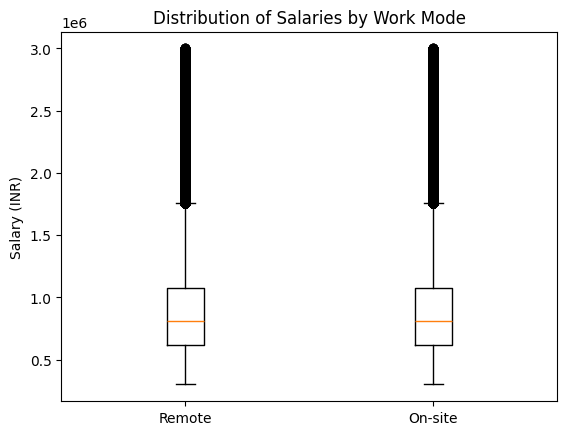

In [ ]:
remote = df[df['Work_Mode'] == 'Remote']['Salary_INR']
onsite = df[df['Work_Mode'] == 'On-site']['Salary_INR']

dataset = [remote,onsite]
labels = ['Remote', 'On-site']
plt.boxplot(dataset, labels=labels)
plt.title('Distribution of Salaries by Work Mode')
plt.ylabel('Salary (INR)')
plt.show()

### Q.14) Find the top 10 employees with the highest salary in each department.



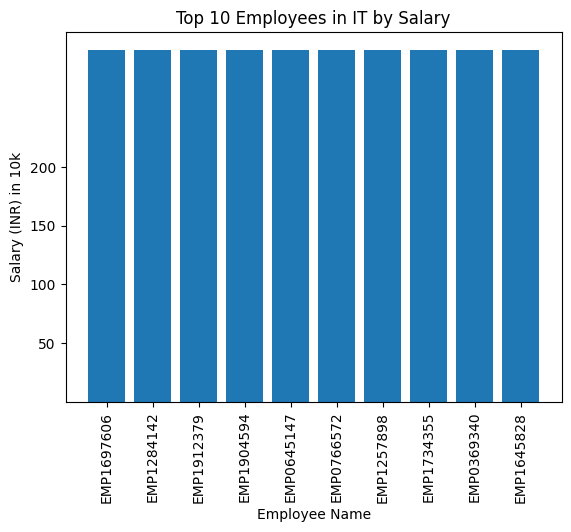

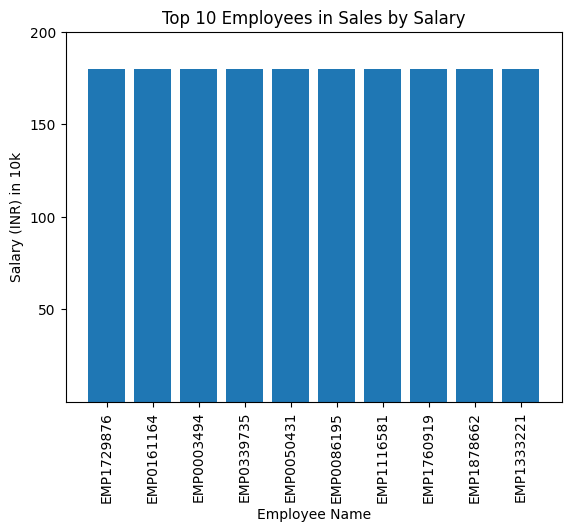

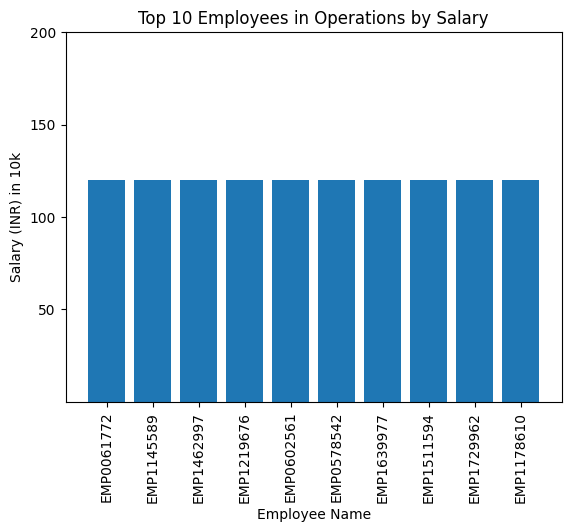

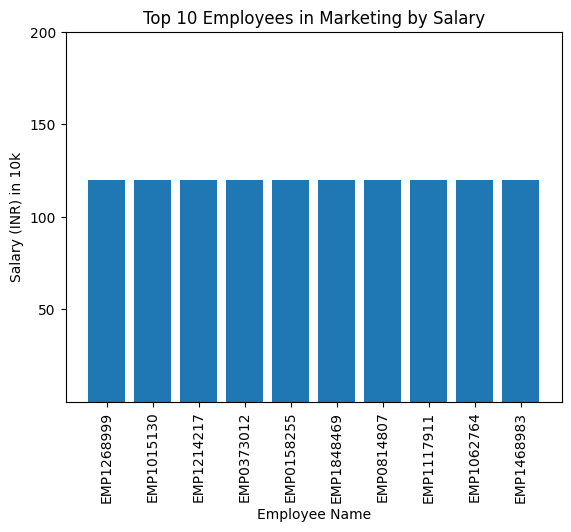

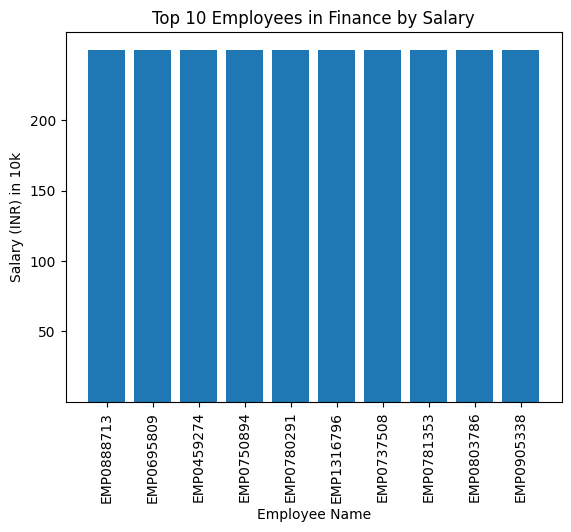

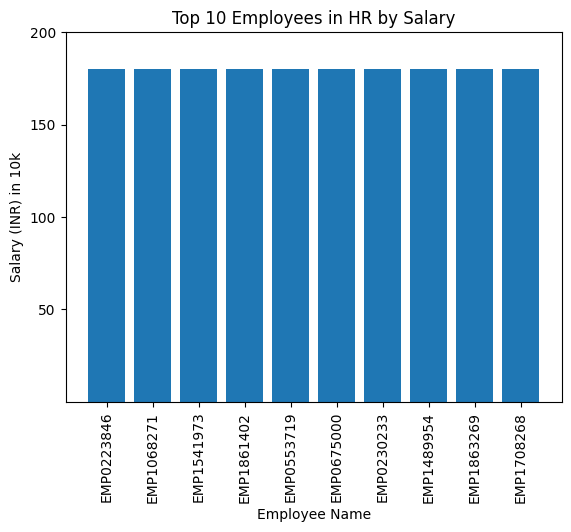

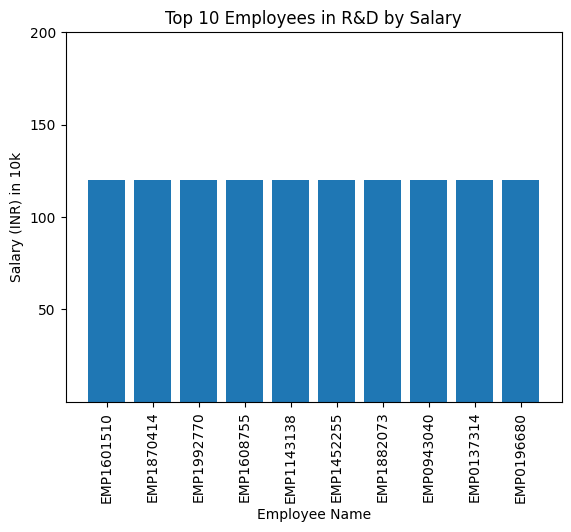

In [ ]:
for dept in df['Department'].value_counts().index:

#dept = 'IT'

  filtered_df = df[df['Department'] == dept]
  sorted_df = filtered_df.sort_values('Salary_INR', ascending=False)
  top_10 = sorted_df.head(10)

  #print(top_10)


  plt.bar(top_10['Employee_ID'], top_10['Salary_INR'])
  plt.title(f'Top 10 Employees in {dept} by Salary')
  plt.xlabel('Employee Name')
  plt.ylabel('Salary (INR) in 10k')
  plt.xticks(rotation=90)
  plt.yticks([500000, 1000000, 1500000, 2000000], ['50', '100', '150', '200'])
  plt.show()


### Q.15) Identify departments with the highest attrition rate (Resigned %).



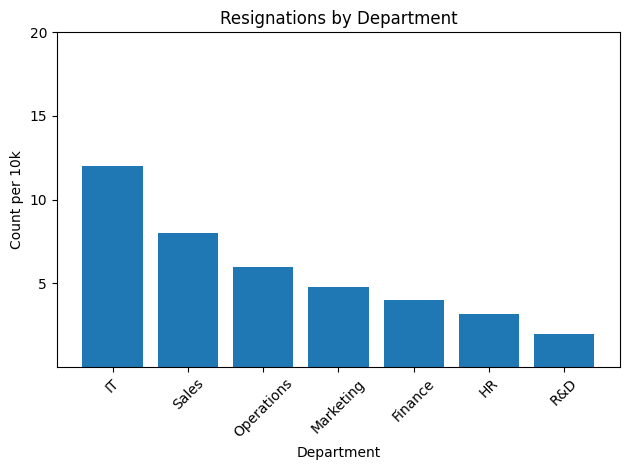

In [ ]:
filtered_df = df[df['Status'].isin(['Resigned'])]
stats = filtered_df.groupby('Department')['Status'].value_counts().unstack(fill_value=0)
stats_sorted = stats.sort_values('Resigned', ascending=False)
stats_sorted

plt.bar(stats_sorted.index, stats_sorted['Resigned'])

plt.title('Resignations by Department')
plt.ylabel('Count per 10k')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.yticks([50000, 100000, 150000, 200000], ['5', '10', '15', '20'])
plt.tight_layout()
plt.show()